In [24]:
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
import pyupbit as up
import numpy as np
from scipy.stats import pearsonr

In [25]:
df = up.get_ohlcv(ticker="KRW-BTC", interval="day")
df.to_csv('bitcoin_data_visualization.csv')

In [26]:
df = pd.read_csv('bitcoin_data_visualization.csv')

In [27]:
# 이동평균 계산
ma_5 = ta.SMA(df['close'], timeperiod=5)  # 5일 이동평균
ma_20 = ta.SMA(df['close'], timeperiod=20)  # 20일 이동평균

# RSI 계산
rsi = ta.RSI(df['close'], timeperiod=14)

# MACD 계산
macd, signal, hist = ta.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)

# 볼린저 밴드 계산
upper, middle, lower = ta.BBANDS(df['close'], timeperiod=20, nbdevup=2, nbdevdn=2)

# 스토캐스틱 계산
slowk, slowd = ta.STOCH(df['high'], df['low'], df['close'], fastk_period=5, slowk_period=3, slowd_period=3)

# OBV 계산
obv = ta.OBV(df['close'], df['volume'])

# ADX 계산
adx = ta.ADX(df['high'], df['low'], df['close'])

# ATR 계산
atr = ta.ATR(df['high'], df['low'], df['close'])

# MFI 계산
mfi = ta.MFI(df['high'], df['low'], df['close'], df['volume'], timeperiod=14)

# ROC 계산
roc = ta.ROC(df['close'], timeperiod=10)

# CCI 계산
cci = ta.CCI(df['high'], df['low'], df['close'], timeperiod=20)

# DMI 계산
dmi_plus = ta.PLUS_DI(df['high'], df['low'], df['close'], timeperiod=14)
dmi_minus = ta.MINUS_DI(df['high'], df['low'], df['close'], timeperiod=14)

## 1. 이동평균

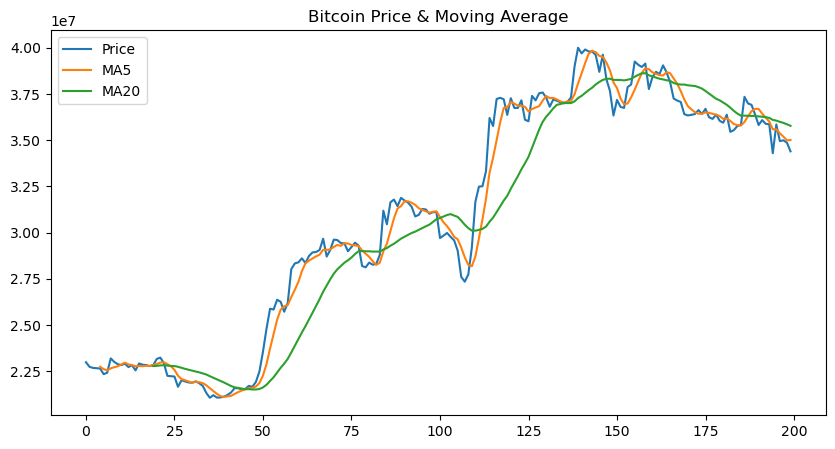

In [12]:
# 데이터프레임 만들기
df_ma = pd.DataFrame({'price': df['close'], 'MA5': ma_5, 'MA20': ma_20})

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(df_ma.index, df_ma['price'], label="Price")
plt.plot(df_ma.index, df_ma['MA5'], label="MA5")
plt.plot(df_ma.index, df_ma['MA20'], label="MA20")
plt.title("Bitcoin Price & Moving Average")
plt.legend(loc='upper left')
plt.show()

## 2. RSI

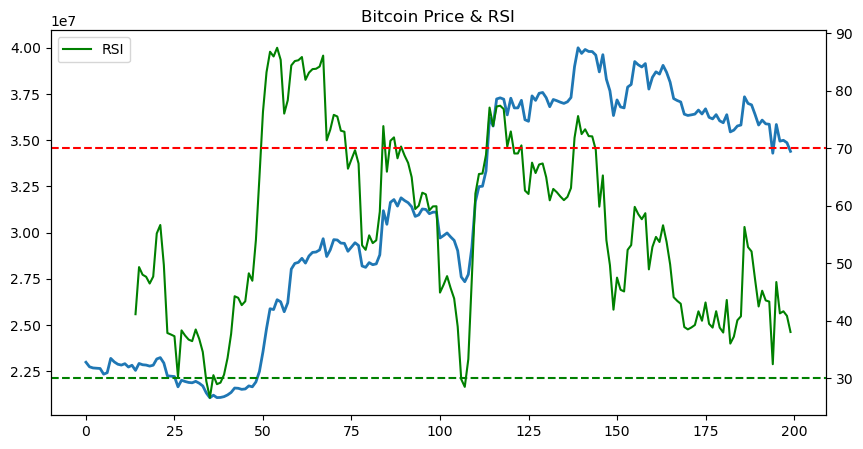

In [13]:
# 데이터프레임 만들기
df_RSI = pd.DataFrame({'price': df['close'], 'RSI': rsi})

# 그래프 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.plot(df_RSI.index, df_RSI['price'], label="Price", linewidth="2")
ax2.plot(df_RSI.index, df_RSI['RSI'], label="RSI", color='green')

plt.axhline(y=30, color='g', linestyle='--')
plt.axhline(y=70, color='r', linestyle='--')

plt.title("Bitcoin Price & RSI")
plt.legend(loc='upper left')
plt.show()

## 3. MACD

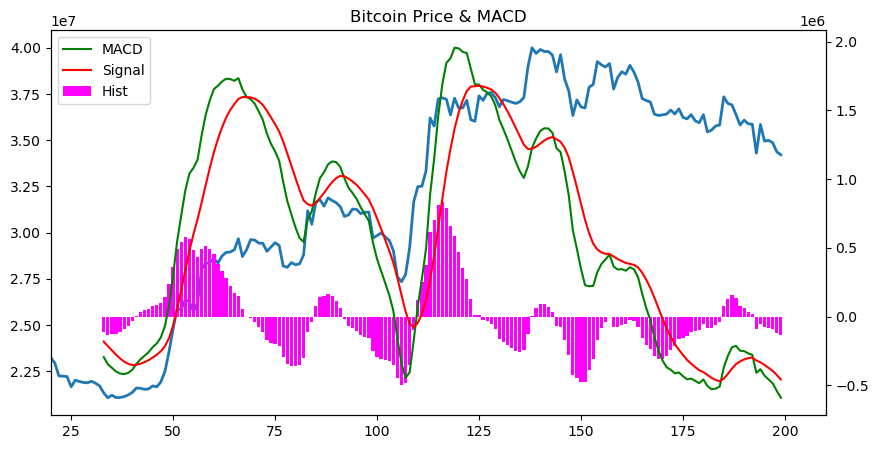

In [33]:
# 데이터프레임 만들기
df_MACD = pd.DataFrame({'price': df['close'], 'MACD': macd, 'Signal': signal,
                       'Hist': hist})

# 그래프 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.plot(df_MACD.index, df_MACD['price'], label="Price", linewidth="2")
ax2.plot(df_MACD.index, df_MACD['MACD'], label="MACD", color='green')
ax2.plot(df_MACD.index, df_MACD['Signal'], label="Signal", color='red')
ax2.bar(df_MACD.index, df_MACD['Hist'], label="Hist", color='magenta')
#ax2.set_ylim(-1.5, 2.0)

plt.title("Bitcoin Price & MACD")
plt.xlim([20,210])
plt.legend(loc='upper left')
plt.show()

## 4. 볼린저 밴드

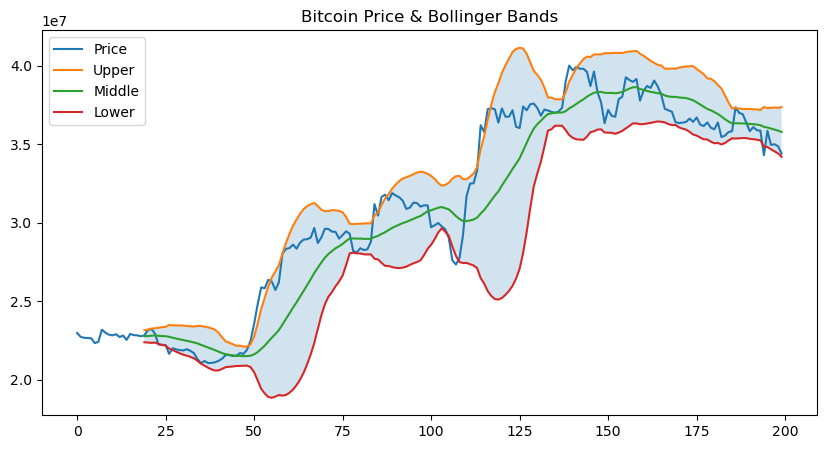

In [15]:
# 데이터프레임 만들기
df_Bands = pd.DataFrame({'price': df['close'], 'Upper': upper, 'Middle': middle,
                       'Lower': lower})

plt.figure(figsize=(10, 5))
plt.plot(df_Bands.index, df_Bands['price'], label="Price")
plt.plot(df_Bands.index, df_Bands['Upper'], label="Upper")
plt.plot(df_Bands.index, df_Bands['Middle'], label="Middle")
plt.plot(df_Bands.index, df_Bands['Lower'], label="Lower")
plt.fill_between(df.index, lower, upper, alpha=0.2)

plt.title("Bitcoin Price & Bollinger Bands")
plt.legend(loc='upper left')
plt.show()

## 5. 스토캐스틱

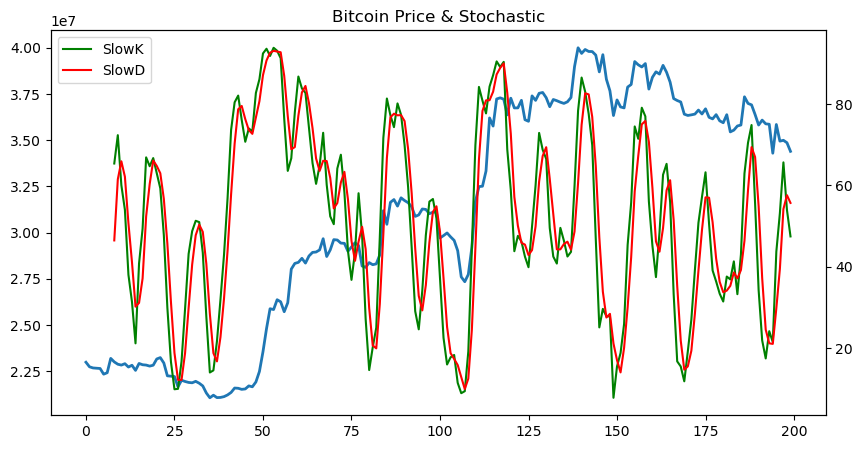

In [16]:
# 데이터프레임 만들기
df_ST = pd.DataFrame({'price': df['close'], 'SlowK': slowk, 'SlowD': slowd})

# 그래프 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.plot(df_ST.index, df_ST['price'], label="Price", linewidth="2")
ax2.plot(df_ST.index, df_ST['SlowK'], label="SlowK", color='green')
ax2.plot(df_ST.index, df_ST['SlowD'], label="SlowD", color='red')

plt.title("Bitcoin Price & Stochastic")
plt.legend(loc='upper left')
plt.show()

## 6. OBV

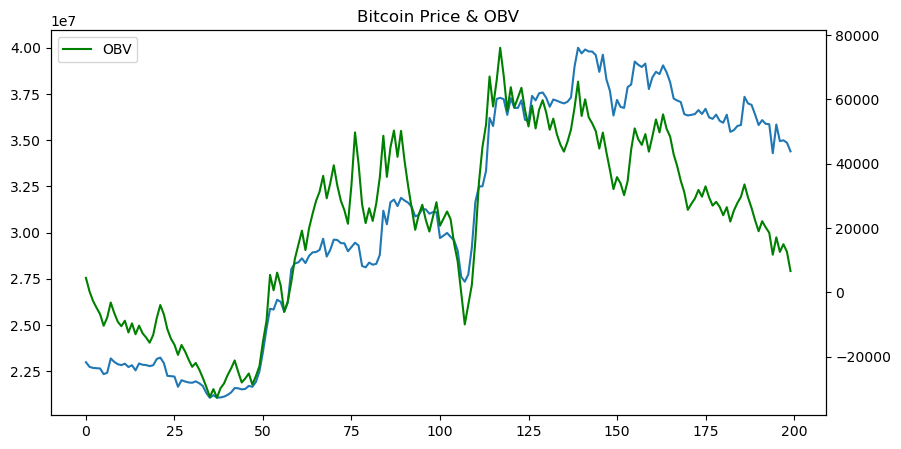

In [17]:
# 그래프 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.plot(df['close'], label="Price")
ax2.plot(obv, label="OBV", color='green')

plt.title("Bitcoin Price & OBV")
plt.legend(loc='upper left')
plt.show()

## 7. ADX

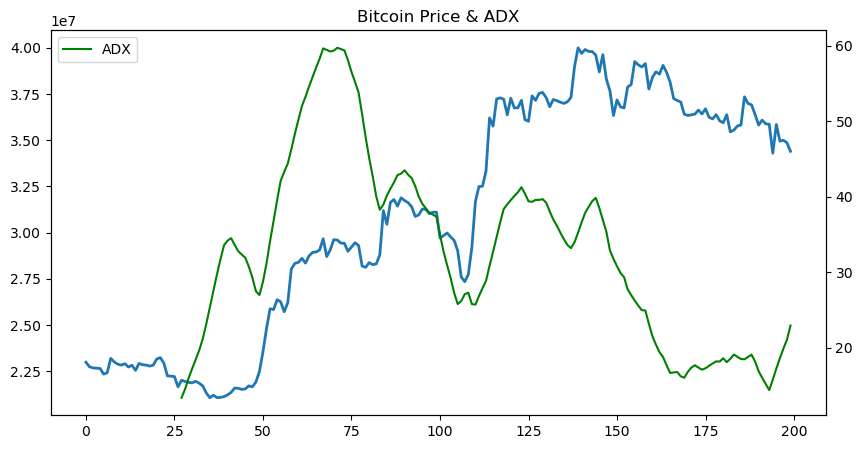

In [18]:
# 그래프 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.plot(df['close'], label="Price", linewidth="2")
ax2.plot(adx, label="ADX", color='green')

plt.title("Bitcoin Price & ADX")
plt.legend(loc='upper left')
plt.show()

## 8. ATR

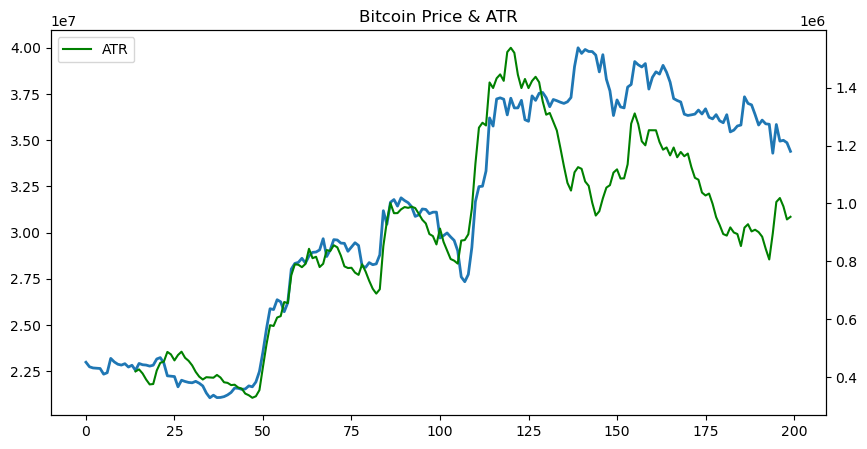

In [19]:
# 그래프 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax2.plot(atr, label="ATR", color='green')
ax1.plot(df['close'], label="Price", linewidth="2")

plt.title("Bitcoin Price & ATR")
plt.legend(loc='upper left')
plt.show()

## 9. MFI

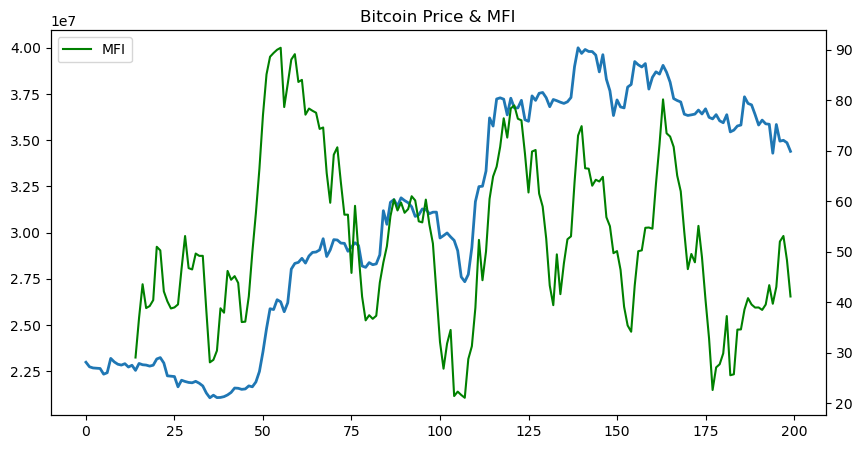

In [20]:
# 그래프 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.plot(df['close'], label="Price", linewidth="2")
ax2.plot(mfi, label="MFI", color='green')

plt.title("Bitcoin Price & MFI")
plt.legend(loc='upper left')
plt.show()

## 10. ROC

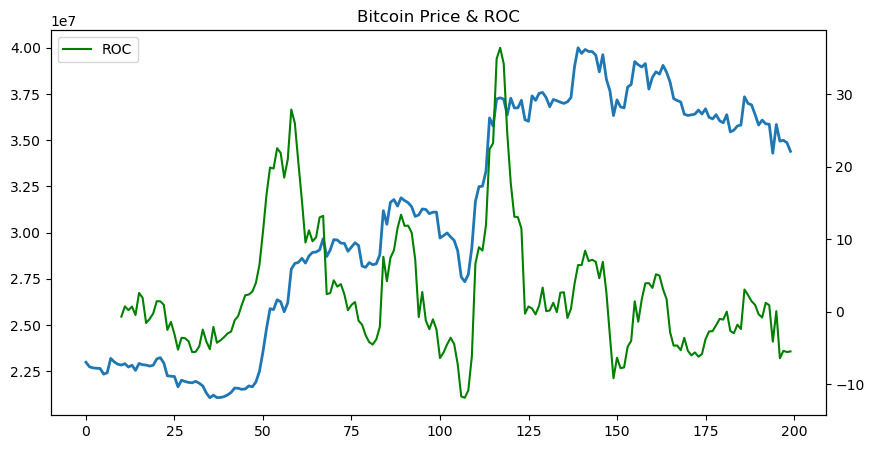

In [21]:
# 그래프 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.plot(df['close'], label="Price", linewidth="2")
ax2.plot(roc, label="ROC", color='green')

plt.title("Bitcoin Price & ROC")
plt.legend(loc='upper left')
plt.show()

## 11. CCI 

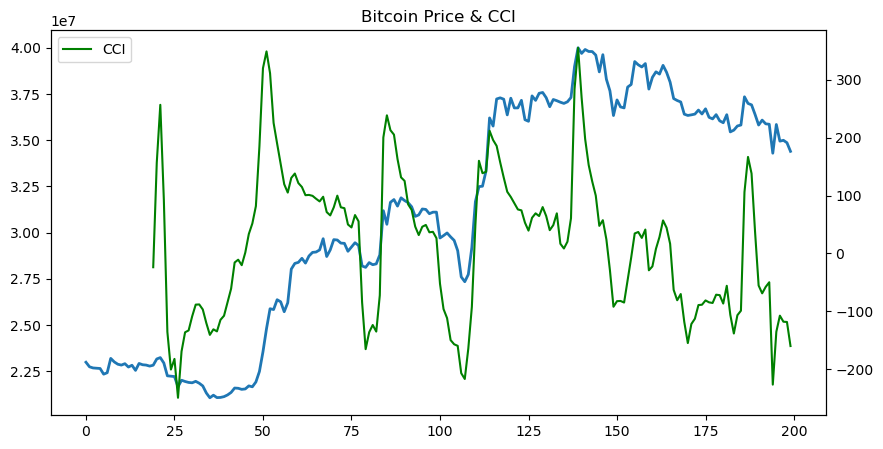

In [22]:
# 그래프 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.plot(df['close'], label="Price", linewidth="2")
ax2.plot(cci, label="CCI", color='green')

plt.title("Bitcoin Price & CCI")
plt.legend(loc='upper left')
plt.show()

## 12. DMI

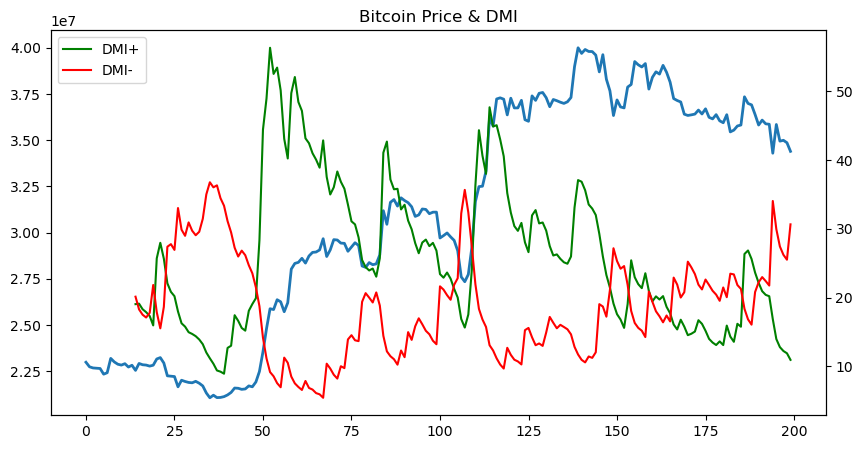

In [23]:
# 그래프 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.plot(df['close'], label="Price", linewidth="2")
ax2.plot(dmi_plus, label="DMI+", color='green')
ax2.plot(dmi_minus, label="DMI-", color='red')

plt.title("Bitcoin Price & DMI")
plt.legend(loc='upper left')
plt.show()